# <font color= 'blue'>Exploratory Data Analysis on Birmingham House Prices</font>

## Enoch A. Akinpelu (PhD, CEng, MIChemE)

## Importing important libraries for analysis

In [1]:
import pandas as pd
import numpy as np

## Data collection

In [2]:
# Read the csv dataset using pandas
df = pd.read_csv('prices.csv')

## Checking for data types

In [3]:
# Get the data type for each column
print(df.dtypes)

unique_id               object
price_paid               int64
deed_date               object
postcode                object
property_type           object
new_build               object
estate_type             object
saon                    object
paon                    object
street                  object
locality                object
district                object
county                  object
transaction_category    object
dtype: object


### <font color = 'red'>We have 13 object data types and one integer in the dataset</font>

## Examining the first 5 rows of the data

In [4]:
# Display the first 5 rows
df.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,district,county,transaction_category
0,30271714-703B-4D25-9ACA-E949676BB7AF,54000,01/01/1995,B29 7NS,T,N,F,NaN,38,FIRST AVENUE,SELLY PARK,BIRMINGHAM,WEST MIDLANDS,A
1,A7A688D7-15EB-4C90-B2B6-8268A9E5CEEF,37000,01/01/1995,B31 5DF,S,N,F,NaN,83,JOSIAH ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A
2,EBBF45BD-BB6B-4944-8DE2-50FC8F8311F0,165500,01/01/1995,B45 8LY,D,N,F,NaN,"BITTELL COTTAGE, 76",BITTELL ROAD,BARNT GREEN,BROMSGROVE,WORCESTERSHIRE,A
3,B819DB02-6562-473B-AFA1-81B60787C2A7,24000,02/01/1995,B29 5TW,T,N,F,NaN,358,ALWOLD ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A
4,91A7BA4B-849C-4CAD-A112-C26597578CC0,33000,02/01/1995,B44 8SA,T,N,F,NaN,155,BIRDBROOK ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A


## Statistical description of the data

In [5]:
# Get the summary statistics for the dataset
df.describe()

,price_paid
count,3.709740e+05
mean,1.406826e+05
std,6.702640e+05
min,1.000000e+00
25%,6.600000e+04
50%,1.100000e+05
75%,1.580000e+05
max,1.381500e+08


## Shape of the data

In [6]:
# Shape of the dataset
df.shape

(370974, 14)

### <font color = 'red'>We have a total of 370,974 rows and 14 columns</font> 

## Check for duplicate rows

In [7]:
# Check for duplicate rows
print('Number of duplicate rows before dropping:', df.duplicated().sum())

Number of duplicate rows before dropping: 0


### <font color = 'red'>There are no duplicate rows in the data.</font>

## Check for missing values

In [8]:
# Check for missing values
print(df.isnull().sum())

unique_id                    0
price_paid                   0
deed_date                    0
postcode                   362
property_type                0
new_build                    0
estate_type                  0
saon                    326369
paon                         4
street                     203
locality                114628
district                     0
county                       0
transaction_category         0
dtype: int64


### <font color = 'red'>There are missing values in five different columns of the dataset</font>

## Data cleaning/pre-processing

In [9]:
# Remove the columns named unique id, saon, paon, street, locality, district and county.
df.drop(['unique_id', 'saon', 'paon', 'street', 'locality', 'district', 'county'], axis=1, inplace=True)

In [10]:
# Remove all the rows which have ‘O’ in the property type column
df = df[df.property_type != 'O']

In [11]:
# In the new build column, convert all of the ‘Y’s to 1 and all of the ‘N’s to 0.
df['new_build'] = df['new_build'].apply(lambda x: 1 if x == 'Y' else 0)

In [12]:
# In the estate type column, convert all of the ‘F’s to 1 and all of the ‘L’s to 0.
df['estate_type'] = df['estate_type'].apply(lambda x: 1 if x == 'F' else 0)

In [13]:
# In the transaction category column, convert all of the ‘A’s to 1 and all of the ‘B’s to 0.
df['transaction_category'] = df['transaction_category'].apply(lambda x: 1 if x == 'A' else 0)

In [14]:
# Remove all of the rows which don’t have a postcode.
df = df[df['postcode'].notna()]

In [15]:
# Now make a copy of the postcode column and name it ‘PC’. 
# For each element in ‘PC’ remove all the letters and spaces to yield a 2 or 3 digit number.
df['PC'] = df['postcode'].str.replace(r'[^0-9]+', '')

C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\828257872.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PC'] = df['postcode'].str.replace(r'[^0-9]+', '')


In [16]:
# Drop postcode column
df.drop('postcode', axis=1, inplace=True)

## Examine updated Dataframe

In [17]:
# display the updated dataframe
df.head()

,price_paid,deed_date,property_type,new_build,estate_type,transaction_category,PC
0,54000,01/01/1995,T,0,1,1,297
1,37000,01/01/1995,S,0,1,1,315
2,165500,01/01/1995,D,0,1,1,458
3,24000,02/01/1995,T,0,1,1,295
4,33000,02/01/1995,T,0,1,1,448


In [18]:
# New data shape
df.shape

(366681, 7)

### <font color = 'red'>The dataset has been reduced to 366,681 rows and 7 columns after cleaning</font>

## Converting deed_date to number of days since 1st January 1995

In [19]:
# Define a function to convert a date in the form day/month/year to the number of days since 1st January 1995
def days_since_1995(date_str):
    # Parse the date string into day, month, year
    day, month, year = date_str.split('/')
    # Convert to integers
    day, month, year = int(day), int(month), int(year)
    # Calculate the number of days since 1st January 1995
    days_since_1995 = (pd.Timestamp(year, month, day) - pd.Timestamp('1995-01-01')).days
    return days_since_1995

## Create a new column 'days' from the deed_date column

In [20]:
# Create a new column called 'days' and use the 'days_since_1995' function to convert the date in the deed_date column
df['days'] = df['deed_date'].apply(days_since_1995)

In [21]:
# Display the updated dataframe
df.head()

,price_paid,deed_date,property_type,new_build,estate_type,transaction_category,PC,days
0,54000,01/01/1995,T,0,1,1,297,0
1,37000,01/01/1995,S,0,1,1,315,0
2,165500,01/01/1995,D,0,1,1,458,0
3,24000,02/01/1995,T,0,1,1,295,1
4,33000,02/01/1995,T,0,1,1,448,1


## Visualizing the property type, new build, estate type and transaction category in a bar chat

In [22]:
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
# Remove 'Other' property types
df = df[df['property_type'] != 'O']

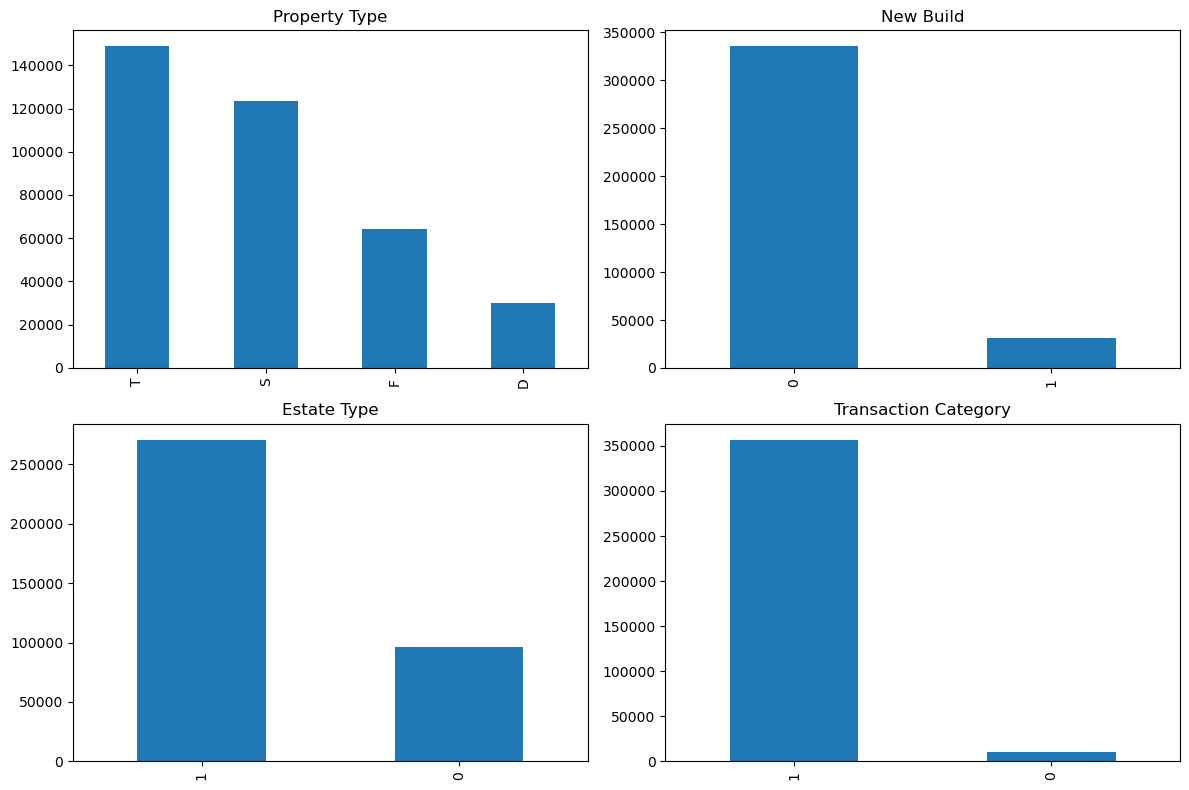

In [24]:
# Create bar charts
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

df['property_type'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Property Type')

df['new_build'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('New Build')

df['estate_type'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Estate Type')

df['transaction_category'].replace({'A': 1, 'B': 0}).value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Transaction Category')

plt.tight_layout()
plt.show()

### <font color = 'red'>Most of the property sold are of type T and they are old building</font>

## Analysis and visualization of detached houses

In [25]:
# Filter out only detached houses
detached = df[df['property_type'] == 'D']
detached.head()

,price_paid,deed_date,property_type,new_build,estate_type,transaction_category,PC,days
2,165500,01/01/1995,D,0,1,1,458,0
7,65000,03/01/1995,D,0,0,1,235,2
38,128500,05/01/1995,D,0,1,1,324,4
41,155000,05/01/1995,D,0,1,1,462,4
47,85000,06/01/1995,D,0,1,1,139,5


In [26]:
# Convert the deed_date column to a pandas datetime object
detached['deed_date'] = pd.to_datetime(detached['deed_date'], format='%d/%m/%Y')

C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\3849941602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detached['deed_date'] = pd.to_datetime(detached['deed_date'], format='%d/%m/%Y')


In [27]:
# Define the start and end dates
start_date = pd.to_datetime('01/01/1995', format='%d/%m/%Y')
end_date = pd.to_datetime('31/12/2019', format='%d/%m/%Y')

In [28]:
# Calculate the number of sales of detached houses over each 365-day period
sales_per_year = []
midpoints = []
for i in range(0, 9131, 365):
    period_start = start_date + pd.Timedelta(i, 'D')
    period_end = period_start + pd.Timedelta(365, 'D')
    period_midpoint = period_start + pd.Timedelta(183, 'D')
    period_sales = detached[(detached['deed_date'] >= period_start) & (detached['deed_date'] < period_end)]['transaction_category'].count()
    sales_per_year.append(period_sales)
    midpoints.append(period_midpoint)

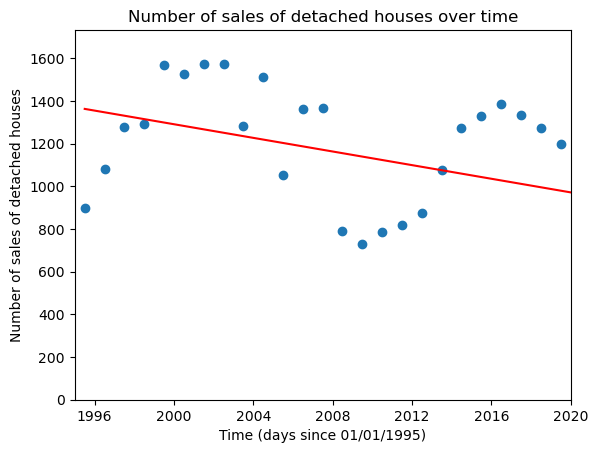

In [29]:
# Create a scatter plot to show the relationship between the number of house sales and time
plt.scatter(midpoints, sales_per_year)
plt.xlabel('Time (days since 01/01/1995)')
plt.ylabel('Number of sales of detached houses')
plt.title('Number of sales of detached houses over time')
plt.xlim([pd.to_datetime('01/01/1995', format='%d/%m/%Y'), pd.to_datetime('01/01/2020', format='%d/%m/%Y')])
plt.ylim([0, max(sales_per_year) * 1.1])

# Add a straight line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress([x.toordinal() for x in midpoints], sales_per_year)
plt.plot(midpoints, intercept + slope * np.array([x.toordinal() for x in midpoints]), 'r')

# Show the plot
plt.show()

### <font color = 'red'>The number of sales of detached houses flunctuate over the years and the line of best fit does not fully represent the sales pattern.</font> 

## Analysis and visualization of mean price of detached houses 

In [30]:
# Calculate the mean price for a detached house in each 365 day period
mean_price_df = pd.DataFrame(columns=['days', 'mean_price'])
for i in range(183, 9125, 365):
    prices = detached[(detached['days'] >= i - 183) & (detached['days'] < i + 182)]['price_paid']
    mean_price = prices.mean()
    mean_price_df = mean_price_df.append({'days': i, 'mean_price': mean_price}, ignore_index=True)

C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\1654224468.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_price_df = mean_price_df.append({'days': i, 'mean_price': mean_price}, ignore_index=True)
C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\1654224468.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_price_df = mean_price_df.append({'days': i, 'mean_price': mean_price}, ignore_index=True)
C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\1654224468.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_price_df = mean_price_df.append({'days': i, 'mean_price': mean_price}, ignore_index=True)
C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\1654224468.py:6

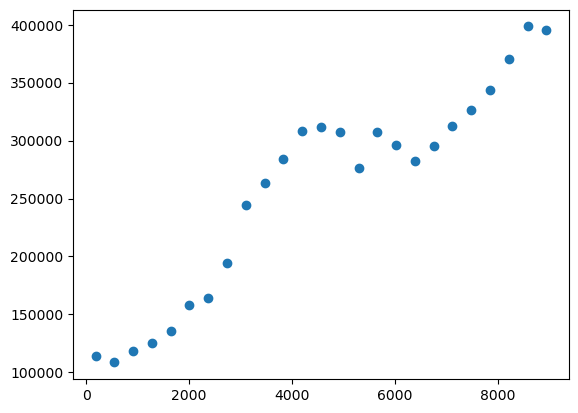

In [31]:
# Plot a scatter plot showing the relationship between the mean house price and n
x = mean_price_df['days']
y = mean_price_df['mean_price']
plt.scatter(x, y);

### <font color ='red'>The mean price of detached houses increases over the time</font>

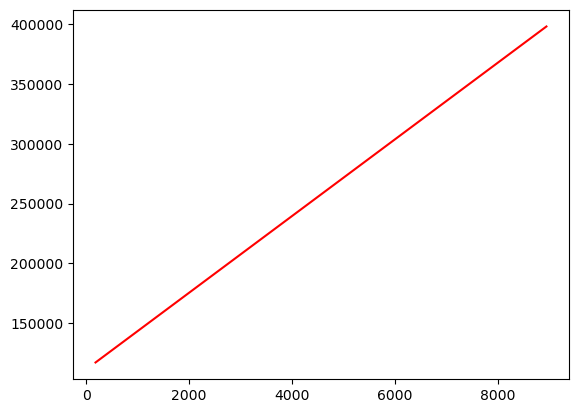

In [32]:
from sklearn.linear_model import LinearRegression
# Fit a line of best fit
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
m = model.coef_[0][0]
b = model.intercept_[0]
plt.plot(x, m*x + b, color='red');

In [33]:
# Evaluate how well the line fits the data
r_squared = model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
print('R-squared:', r_squared)

R-squared: 0.8936702905079335


### <font color ='red'>There is a positive linear relationship between the mean price of detached houses and days with R-squared of 0.8937</font>

## Normalizing the price paid for the detached houses using the line of best fit

In [34]:
# Normalize the price paid data in the detached houses dataframe using the line of best fit
detached['normalized_price'] = (detached['price_paid'] - y.mean()) / y.std()

C:\Users\Akinbiyi Akinpelu\AppData\Local\Temp\ipykernel_8944\3771399136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detached['normalized_price'] = (detached['price_paid'] - y.mean()) / y.std()


In [35]:
detached.head()

,price_paid,deed_date,property_type,new_build,estate_type,transaction_category,PC,days,normalized_price
2,165500,1995-01-01,D,0,1,1,458,0,-1.011297
7,65000,1995-01-03,D,0,0,1,235,2,-2.114248
38,128500,1995-01-05,D,0,1,1,324,4,-1.417359
41,155000,1995-01-05,D,0,1,1,462,4,-1.126531
47,85000,1995-01-06,D,0,1,1,139,5,-1.894755


In [36]:
# Calculate mean normalized price paid data for each PC
normalized_price_data = detached.groupby('PC')['normalized_price'].mean().reset_index()
normalized_price_data.head()

,PC,normalized_price
0,100,-0.807818
1,109,-1.268848
2,11,-0.245817
3,111,-1.060720
4,112,-1.444472


In [37]:
# Sort the data by normalized price in descending order
sorted_data = normalized_price_data.sort_values(by='normalized_price', ascending=False)

In [38]:
# Get the top 10 PC's with the highest normalized price
top_10_pc = sorted_data.head(10)

In [39]:
print(top_10_pc)

      PC  normalized_price
19   151          4.264580
20   152          3.341464
21   153          3.107760
99   458          1.828477
26   178          1.601782
13   138          1.183729
59   297          1.112395
27   179          1.107570
104   47          1.050104
102  462          0.957219


## Inference

- <font color= 'red'>The initial dataset contain 370,974 rows and 14 columns was reduced to 366,681 rows 7 columns after cleaning.</font>
- <font color= 'red'>Most of the property sold are of type T and they are old buildings.</font>
- <font color= 'red'>The number of sales of detached houses flunctuate over the years and the line of best fit does not fully represent the sales pattern.</font>
- <font color= 'red'>The mean price of detached houses increases over the time.</font>
- <font color= 'red'>There is a positive linear relationship between the mean price of detached houses and days with R-squared of 0.8937.</font>